In [112]:
import pandas as pd
import numpy as np
%matplotlib inline

In [33]:
data = pd.read_spss('loan_roc.sav')

In [53]:
e1_train = [72,50,80,66,50,33,58,96,65,39,57,61,43,45,52]
e2_train = [87,88,67,76,82,87,85,64,35,86,66,80,75,51,60]
f_train = [0,0,0,0,0,0,0,0,1,1,0,0,1,1,1]
train_data = pd.DataFrame(columns=['E1', 'E2', 'F'])
train_data['E1'] = e1_train
train_data['E2'] = e2_train
train_data['F'] = f_train
train_data

,E1,E2,F
0,72,87,0
1,50,88,0
2,80,67,0
3,66,76,0
4,50,82,0
5,33,87,0
6,58,85,0
7,96,64,0
8,65,35,1
9,39,86,1


In [54]:
e1_test = [44,38,83,67,49]
e2_test = [82,87,68,59,48]
f_test = [0,1,0,0,1]
test_data = pd.DataFrame(columns=['E1', 'E2', 'F'])
test_data['E1'] = e1_test
test_data['E2'] = e2_test
test_data['F'] = f_test
test_data

,E1,E2,F
0,44,82,0
1,38,87,1
2,83,68,0
3,67,59,0
4,49,48,1


### 중심과의 거리를 이용하는 방법

In [55]:
# 클래스별 중심: 클래스 0
train_data[train_data.F==0].mean()

E1    62.3
E2    78.2
F      0.0
dtype: float64

In [56]:
# 클래스별 중심: 클래스 1
train_data[train_data.F==1].mean()

E1    48.8
E2    61.4
F      1.0
dtype: float64

In [57]:
for col in train_data.values:
    print(col)

[72 87  0]
[50 88  0]
[80 67  0]
[66 76  0]
[50 82  0]
[33 87  0]
[58 85  0]
[96 64  0]
[65 35  1]
[39 86  1]
[57 66  0]
[61 80  0]
[43 75  1]
[45 51  1]
[52 60  1]


In [58]:
pred = []
pred_data = train_data
avg_0 = pred_data[pred_data.F==0].mean()[:-1]
avg_1 = pred_data[pred_data.F==1].mean()[:-1]
for e1, e2, f in pred_data.values:
    d_0 = np.sqrt((e1 - avg_0.E1)**2 + (e2 - avg_0.E2)**2)
    d_1 = np.sqrt((e1 - avg_1.E1)**2 + (e2 - avg_1.E2)**2)
    if d_0 > d_1:
        pred.append(1)
    else:
        pred.append(0)
pred

[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]

In [59]:
train_data['pred'] = pred
train_data

,E1,E2,F,pred
0,72,87,0,0
1,50,88,0,0
2,80,67,0,0
3,66,76,0,0
4,50,82,0,0
5,33,87,0,1
6,58,85,0,0
7,96,64,0,0
8,65,35,1,1
9,39,86,1,0


In [60]:
len(train_data[train_data.F==train_data.pred]) / len(train_data)

0.8

In [61]:
pred = []
pred_data = test_data
# avg_0 = pred_data[pred_data.F==0].mean()[:-1]
# avg_1 = pred_data[pred_data.F==1].mean()[:-1]
for e1, e2, f in pred_data.values:
    d_0 = np.sqrt((e1 - avg_0.E1)**2 + (e2 - avg_0.E2)**2)
    d_1 = np.sqrt((e1 - avg_1.E1)**2 + (e2 - avg_1.E2)**2)
    if d_0 > d_1:
        pred.append(1)
    else:
        pred.append(0)
pred

[0, 0, 0, 1, 1]

In [62]:
test_data['pred'] = pred
test_data

,E1,E2,F,pred
0,44,82,0,0
1,38,87,1,0
2,83,68,0,0
3,67,59,0,1
4,49,48,1,1


In [63]:
len(test_data[test_data.F==test_data.pred]) / len(test_data)

0.6

### 회귀를 이용하는 방법

In [65]:
import statsmodels.formula.api as sm

In [69]:
model = sm.ols('F ~ E1+E2', data=train_data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      F   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     8.946
Date:                Tue, 08 Feb 2022   Prob (F-statistic):            0.00419
Time:                        00:20:48   Log-Likelihood:                -3.1586
No. Observations:                  15   AIC:                             12.32
Df Residuals:                      12   BIC:                             14.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9106      0.615      4.730      0.0

In [70]:
model.params

Intercept    2.910559
E1          -0.017306
E2          -0.021721
dtype: float64

In [74]:
train_data['reg_pred'] = model.params.Intercept + model.params.E1*train_data.E1 + model.params.E2*train_data.E2
train_data

,E1,E2,F,pred,reg_pred
0,72,87,0,0,-0.225193
1,50,88,0,0,0.133814
2,80,67,0,0,0.070782
3,66,76,0,0,0.117574
4,50,82,0,0,0.264141
5,33,87,0,1,0.449734
6,58,85,0,0,0.060531
7,96,64,0,0,-0.140947
8,65,35,1,1,1.025444
9,39,86,1,0,0.367620


In [87]:
train_data['reg_F'] = (train_data.reg_pred > train_data.groupby('F').mean().mean().reg_pred).astype(int)

In [89]:
len(train_data[train_data.F==train_data.reg_F]) / len(train_data)

0.8

In [91]:
test_data['reg_pred'] = model.params.Intercept + model.params.E1*test_data.E1 + model.params.E2*test_data.E2
test_data['reg_F'] = (test_data.reg_pred > train_data.groupby('F').mean().mean().reg_pred).astype(int)

In [92]:
len(test_data[test_data.F==test_data.reg_F]) / len(test_data)

0.6

In [127]:
model.params

Intercept    2.910559
E1          -0.017306
E2          -0.021721
dtype: float64

Text(85, 42, 'E1')

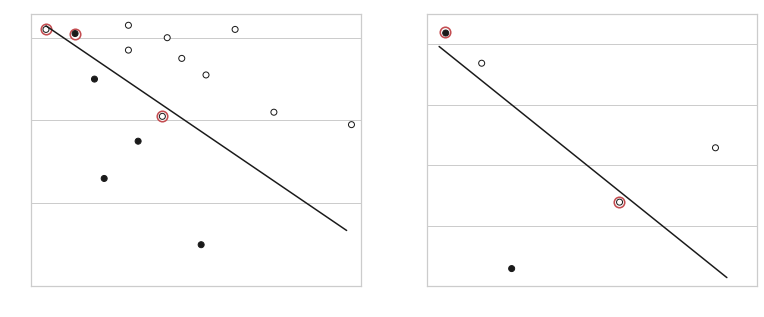

In [484]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
axes[0].scatter(x=train_data[train_data.F!=train_data.reg_F].E1, y=train_data[train_data.F!=train_data.reg_F].E2, c='w', edgecolor='r', s=110, lw=1.6)
axes[0].scatter(x=train_data.E1, y=train_data.E2, c=['k' if val else 'w' for val in train_data.F], edgecolor='k')
axes[0].plot([33, 95], [114.1705 - 0.7972 * num for num in [33, 95]], color='k')
axes[0].set_yticks([25, 45, 65, 85])
axes[0].set_xlim(30, 98)
axes[0].grid(axis='x')
axes[0].tick_params(axis='both', colors='w')
axes[0].text(25,90, 'E2', color='w', fontsize=13)
axes[0].text(95,20, 'E1', color='w', fontsize=13)

axes[1].scatter(x=test_data[test_data.F!=test_data.reg_F].E1, y=test_data[test_data.F!=test_data.reg_F].E2, c='w', edgecolor='r', s=110, lw=1.6)
axes[1].scatter(x=test_data.E1+0.1, y=test_data.E2-0.1, c=['k' if val else 'w' for val in test_data.F], edgecolor='k')
axes[1].plot([37, 85], [114.1705 - 0.7972 * num for num in [37, 85]], color='k')
axes[1].set_yticks([45, 55, 65, 75, 85])
axes[1].set_xticks([35, 45, 55, 65, 75])
axes[1].set_xlim(35, 90)
axes[1].set_ylim(45, 90)
axes[1].grid(axis='x')
axes[1].tick_params(axis='both', colors='w')
axes[1].text(31,88, 'E2', color='w', fontsize=13)
axes[1].text(85,42, 'E1', color='w', fontsize=13)


In [288]:
u_0 = train_data[train_data.F==0].mean()[['E1', 'E2']]
u_1 = train_data[train_data.F==1].mean()[['E1', 'E2']]
print(u_0)
print(u_1)
print(u_0 - u_1)

E1    62.3
E2    78.2
dtype: float64
E1    48.8
E2    61.4
dtype: float64
E1    13.5
E2    16.8
dtype: float64


In [294]:
np.cov(train_data.loc[train_data.F==0, ['E1','E2']], rowvar=False) # 결과가 책의 공분산과 다름

array([[ 307.34444444, -110.17777778],
       [-110.17777778,   88.4       ]])

### 공분산 직접 구해보기

In [ ]:
# F=0 클래스의 공분산

In [395]:
var_0_E1 = ((train_data.loc[train_data.F==0].E1 - u_0.E1)**2).mean()
var_0_E1

276.61

In [396]:
var_0_E2 = ((train_data.loc[train_data.F==0].E2 - u_0.E2)**2).mean()
var_0_E2

79.56

In [397]:
var_0_E1_E2 = ((train_data.loc[train_data.F==0].E1 - u_0.E1)*(train_data.loc[train_data.F==0].E2 - u_0.E2)).mean()
var_0_E1_E2

-99.16000000000001

In [398]:
cov_0 = np.array([[var_0_E1, var_0_E1_E2], [var_0_E1_E2, var_0_E2]])
cov_0

array([[276.61, -99.16],
       [-99.16,  79.56]])

In [401]:
# F=1 클래스의 공분산

In [402]:
var_1_E1 = ((train_data.loc[train_data.F==1].E1 - u_1.E1)**2).mean()
var_1_E1

83.36000000000001

In [403]:
var_1_E2 = ((train_data.loc[train_data.F==1].E2 - u_1.E2)**2).mean()
var_1_E2

319.43999999999994

In [404]:
var_1_E1_E2 = ((train_data.loc[train_data.F==1].E1 - u_1.E1)*(train_data.loc[train_data.F==1].E2 - u_1.E2)).mean()
var_1_E1_E2

-142.52

In [405]:
cov_1 = np.array([[var_1_E1, var_1_E1_E2], [var_1_E1_E2, var_1_E2]])
cov_1

array([[  83.36, -142.52],
       [-142.52,  319.44]])

In [392]:
# 클래스 내 분산
V_w = cov_0 + cov_1
V_w

array([[ 359.97, -241.68],
       [-241.68,  399.  ]])

In [409]:
# 행렬식 계산
det = V_w[0,0]*V_w[1,1] - V_w[0,1]*V_w[1,0]
det

85218.8076

In [416]:
# 역행렬 계산 = 1 / det * [[d, -b], [-c, a]]
np.array([[V_w[1,1], -V_w[0,1]], [-V_w[1,0], V_w[0,0]]]) / det

array([[0.00468207, 0.00283599],
       [0.00283599, 0.00422407]])

In [393]:
# 역행렬 계산 w/ numpy
np.linalg.inv(V_w)

array([[0.00468207, 0.00283599],
       [0.00283599, 0.00422407]])

In [438]:
# 판별식의 계수
beta = np.dot(np.array([u_0 - u_1]), np.linalg.inv(V_w)).round(4)[0]
beta

array([0.1109, 0.1093])

In [439]:
# 임계값과 비교할 tF^ = 0.1109 * E1 + 0.1093 * E2
# 사영 선 위에서 각 클래스의 평균점
m_0 = np.dot(beta, u_0.T)
m_0

15.45633

In [440]:
m_1 = np.dot(beta, u_1.T)
m_1

12.12294

In [441]:
# 임계값은 m_0과 m_1의 평균으로 구한다
(m_0+m_1) / 2

13.789635

In [ ]:
# 판별식 = 0.1109 * E1 + 0.1093 * E2 = 13.7896

In [450]:
train_data['tF_pred'] = (train_data.E1 * beta[0]) + (train_data.E2 * beta[1])
train_data['tF_F'] = (train_data.tF_pred < 13.7896).astype(int)
train_data

,E1,E2,F,pred,reg_pred,reg_F,tF_pred,tF_F
0,72,87,0,0,-0.225193,0,17.4939,0
1,50,88,0,0,0.133814,0,15.1634,0
2,80,67,0,0,0.070782,0,16.1951,0
3,66,76,0,0,0.117574,0,15.6262,0
4,50,82,0,0,0.264141,0,14.5076,0
5,33,87,0,1,0.449734,1,13.1688,1
6,58,85,0,0,0.060531,0,15.7227,0
7,96,64,0,0,-0.140947,0,17.6416,0
8,65,35,1,1,1.025444,1,11.0340,1
9,39,86,1,0,0.367620,0,13.7249,1


In [451]:
test_data['tF_pred'] = (test_data.E1 * beta[0]) + (test_data.E2 * beta[1])
test_data['tF_F'] = (test_data.tF_pred < 13.7896).astype(int)
test_data

,E1,E2,F,pred,reg_pred,reg_F,tF_pred,tF_F
0,44,82,0,0,0.367975,0,13.8422,0
1,38,87,1,0,0.363205,0,13.7233,1
2,83,68,0,0,-0.002856,0,16.6371,0
3,67,59,0,1,0.469527,1,13.8790,0
4,49,48,1,1,1.019963,1,10.6805,1


In [ ]:
# E2 = 13.7896/0.1093 - 0.1109/0.1093 *E1

In [454]:
round(13.7896/0.1093, 4)

126.1629

In [455]:
round(0.1109/0.1093, 4)

1.0146

Text(85, 42, 'E1')

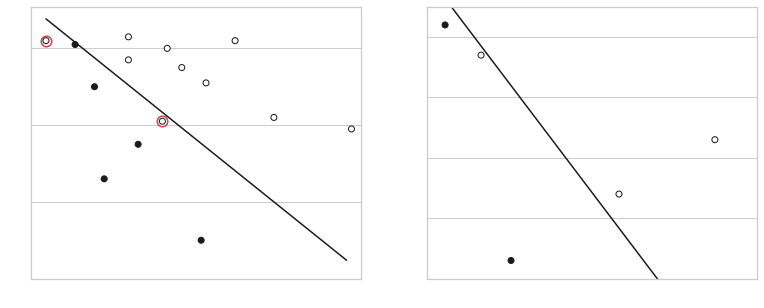

In [483]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))
axes[0].scatter(x=train_data[train_data.F!=train_data.tF_F].E1, y=train_data[train_data.F!=train_data.tF_F].E2, c='w', edgecolor='r', s=110, lw=1.6)
axes[0].scatter(x=train_data.E1, y=train_data.E2, c=['k' if val else 'w' for val in train_data.F], edgecolor='k')
axes[0].plot([33, 95], [126.1629 - 1.0146 * num for num in [33, 95]], color='k')
axes[0].set_yticks([25, 45, 65, 85])
axes[0].set_xlim(30, 98)
axes[0].grid(axis='x')
axes[0].tick_params(axis='both', colors='w')
axes[0].text(25,90, 'E2', color='w', fontsize=13)
axes[0].text(95,20, 'E1', color='w', fontsize=13)

axes[1].scatter(x=test_data[test_data.F!=test_data.tF_F].E1, y=test_data[test_data.F!=test_data.tF_F].E2, c='w', edgecolor='r', s=110, lw=1.6)
axes[1].scatter(x=test_data.E1, y=test_data.E2, c=['k' if val else 'w' for val in test_data.F], edgecolor='k')
axes[1].plot([37, 85], [126.1629 - 1.0146 * num for num in [33, 95]], color='k')
axes[1].set_yticks([45, 55, 65, 75, 85])
axes[1].set_xticks([35, 45, 55, 65, 75])
axes[1].set_xlim(35, 90)
axes[1].set_ylim(45, 90)
axes[1].grid(axis='x')
axes[1].tick_params(axis='both', colors='w')
axes[1].text(31,88, 'E2', color='w', fontsize=13)
axes[1].text(85,42, 'E1', color='w', fontsize=13)

In [489]:
round(len(train_data[train_data.F == train_data.tF_F]) / len(train_data)*100, 2)

86.67

In [490]:
round(len(test_data[test_data.F == test_data.tF_F]) / len(test_data)*100, 2)

100.0